In [207]:
## We first load in packages we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

BikeCrashData = pd.read_csv('data/NCDOT_BikePedCrash.csv')

In [208]:
# Keeping only the relevant columns
BikeCrashData = BikeCrashData[['AmbulanceR',
        'BikeAgeGrp','BikeDir', 'BikeInjury', 'BikePos','BikeRace', 'BikeSex', 
        'City', 'County', 'CrashDay', 'CrashHour', 'CrashMonth','CrashYear','CrashType',
        'NumLanes','RdConditio', 'RdConfig','RdFeature', 'RdSurface', 'RuralUrban', 'SpeedLimit', 'Weather', 'Workzone']]

# Analysis with respect to Ambulance reponse

In [209]:

# Adding a binary column for some features
BikeCrashData['AmbR_binary'] = BikeCrashData['AmbulanceR'].apply(lambda x: 1 if x == 'Yes' else 0)

# Making splits, stratifying on Ambulance Response
Bike_train, Bike_test = train_test_split(BikeCrashData.copy(),
                                        shuffle=True, 
                                        test_size=0.2, 
                                        random_state=614,
                                        stratify=BikeCrashData['AmbR_binary'])

# Keeping a holdout set for validation
Bike_train, Bike_val = train_test_split(Bike_train.copy(),
                                        shuffle=True, 
                                        test_size=0.2, 
                                        #random_state=614,
                                        stratify=Bike_train['AmbR_binary'])

## No penalty Logistic regression

### What features should we use to predict ambulance response?

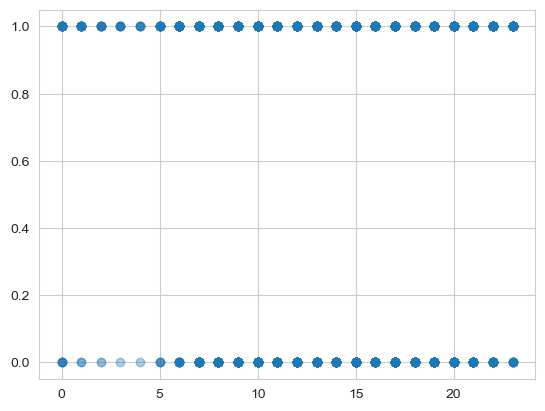

In [210]:
plt.scatter(Bike_train['CrashHour'],Bike_train['AmbR_binary'],alpha=0.1)

In [211]:
# There doesn't seem to be a strong relationship between the hour of the crash and whether or not an ambulance was called.
# Same thing is observed for the day, month, and year of the crash.

<Axes: xlabel='CrashHour', ylabel='AmbR_binary'>

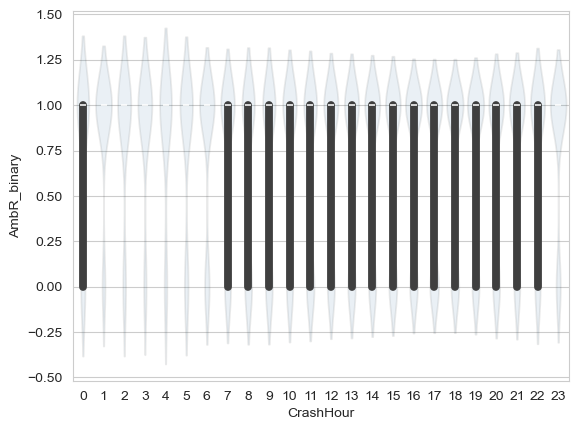

In [212]:
sns.violinplot(x='CrashHour',y='AmbR_binary',data=Bike_train,alpha=0.1)

In [213]:
# Combine hours into day parts
def day_part(hour):
    if hour < 6:
        return 0
    elif hour < 12:
        return 1
    elif hour < 18:
        return 2
    else:
        return 3
    
Bike_train['CrashHour'] = Bike_train['CrashHour'].apply(day_part)
Bike_val['CrashHour'] = Bike_val['CrashHour'].apply(day_part)

<Axes: xlabel='CrashHour', ylabel='AmbR_binary'>

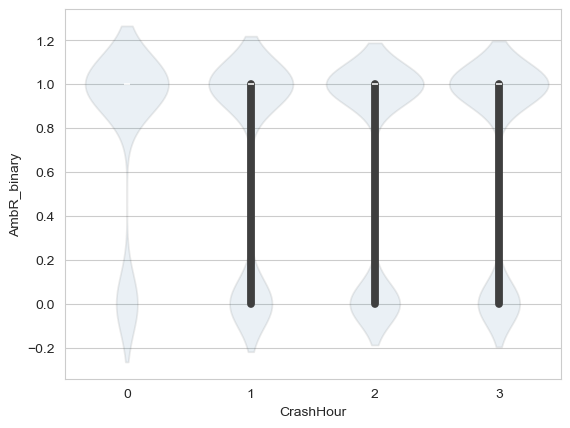

In [217]:
sns.violinplot(x='CrashHour',y='AmbR_binary',data=Bike_train,alpha=0.1)

In [ ]:
# Fit logistic regression with default ridge penalty to the training data
log_reg_none=LogisticRegression(penalty=None)
log_reg_none.fit(Bike_train[['CrashHour']],Bike_train['AmbR_binary'])

# Evaluate the model on the validation set
print('Validation Accuracy:', accuracy_score(Bike_val['AmbR_binary'],log_reg_none.predict(Bike_val[['CrashHour']])))
print('Validation Recall:', recall_score(Bike_val['AmbR_binary'],log_reg_none.predict(Bike_val[['CrashHour']])))
print('Validation Precision:', precision_score(Bike_val['AmbR_binary'],log_reg_none.predict(Bike_val[['CrashHour']])))
print('Validation Confusion Matrix:\n', confusion_matrix(Bike_val['AmbR_binary'],log_reg_none.predict(Bike_val[['CrashHour']])))

Validation Accuracy: 0.6794231835829173
Validation Recall: 1.0
Validation Precision: 0.6794231835829173
Validation Confusion Matrix:
 [[   0  578]
 [   0 1225]]


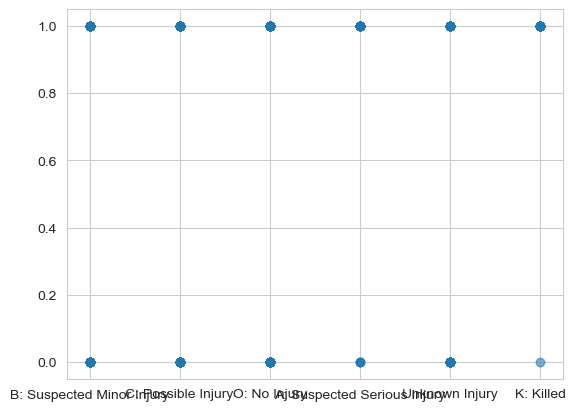

In [139]:
# Let's see how bike injuries are related to ambulance response
plt.scatter(Bike_train['BikeInjury'],Bike_train['AmbR_binary'],alpha=0.1)

<Axes: xlabel='BikeInjury', ylabel='AmbR_binary'>

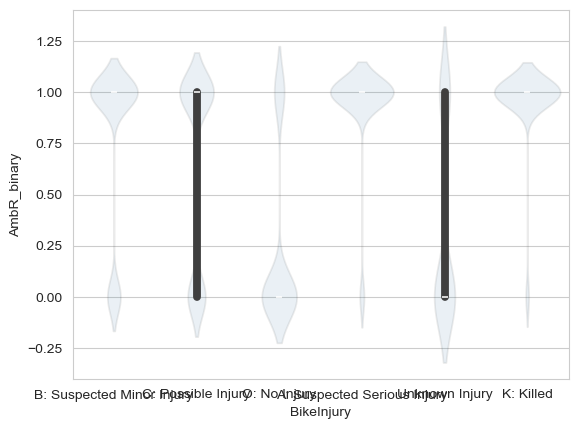

In [140]:
sns.violinplot(x='BikeInjury',y='AmbR_binary',data=Bike_train,alpha=0.1)

In [119]:
# There doesn't seem to be a strong relationship between the type of injury and whether or not an ambulance was called.
# We will take care of this feature in the next step.

# Recombining speed limit into three categories
# 1. Low (0-25 mph)
# 2. Medium (26-45 mph)
# 3. High (46+ mph)

def speed_limit(x):
    if x in ['5 - 15 MPH', '20 - 25  MPH', 'Unknown']:
        return 0
    
    elif x in ['30 - 35  MPH', '40 - 45  MPH']:
        return 1
    
    else:
        return 2
    
Bike_train['SpeedLimit_Cat'] = Bike_train['SpeedLimit'].apply(speed_limit)
Bike_val['SpeedLimit_Cat'] = Bike_val['SpeedLimit'].apply(speed_limit)

<Axes: xlabel='SpeedLimit_Cat', ylabel='AmbR_binary'>

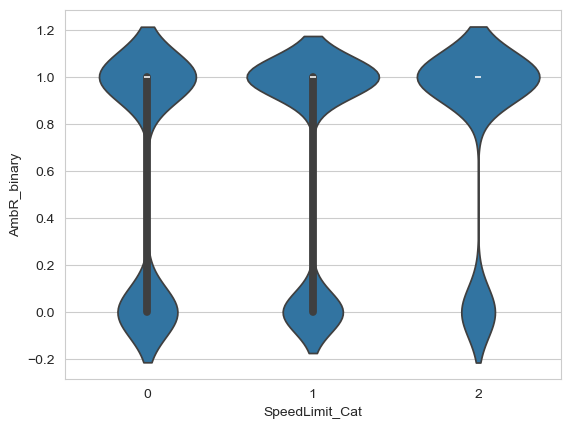

In [120]:
sns.violinplot(x='SpeedLimit_Cat',y='AmbR_binary',data=Bike_train)

In [121]:
# Fit logistic regression with no penalty to the training data
log_reg_none.fit(Bike_train[['SpeedLimit_Cat']],Bike_train['AmbR_binary'])


LogisticRegression(penalty=None, random_state=614)

In [ ]:

# Evaluate the model on the validation set
print('Validation Accuracy:', accuracy_score(Bike_val['AmbR_binary'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))
print('Validation Recall:', recall_score(Bike_val['AmbR_binary'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))
print('Validation Precision:', precision_score(Bike_val['AmbR_binary'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))
print('Validation Confusion Matrix:\n', confusion_matrix(Bike_val['AmbR_binary'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))

Validation Accuracy: 0.6794231835829173
Validation Recall: 1.0
Validation Precision: 0.6794231835829173
Validation Confusion Matrix:
 [[   0  578]
 [   0 1225]]


In [123]:
# Fit logistic regression with default ridge penalty to the training data
log_reg_none = LogisticRegression(random_state=614)
log_reg_none.fit(Bike_train[['SpeedLimit_Cat']],Bike_train['AmbR_binary'])

# Evaluate the model on the validation set
print('Validation Accuracy:', accuracy_score(Bike_val['AmbR_binary'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))
print('Validation Recall:', recall_score(Bike_val['AmbR_binary'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))
print('Validation Precision:', precision_score(Bike_val['AmbR_binary'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))
print('Validation Confusion Matrix:\n', confusion_matrix(Bike_val['AmbR_binary'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))

Validation Accuracy: 0.6794231835829173
Validation Recall: 1.0
Validation Precision: 0.6794231835829173
Validation Confusion Matrix:
 [[   0  578]
 [   0 1225]]


In [ ]:
# Data imbalance is causing the model to always predict the majority class (1).
# Let's try using a different feature to see if we can get a better model.

# Analysis with respect to BikeInjuries

In [219]:
# Dropping unknown injuries
BikeCrashData.drop(BikeCrashData[BikeCrashData['BikeInjury'] == 'Unknown Injury'].index, inplace=True)

# Recombining injuries into two main classes (Light '0' and Severe '1')
BikeCrashData['BikeInjury'] = BikeCrashData['BikeInjury'].replace({'B: Suspected Minor Injury':0,'C: Possible Injury':0, 'O: No Injury':0,'K: Killed':1,'A: Suspected Serious Injury':1 })

# Splitting the data into training and test sets, stratifying on BikeInjury
Bike_train, Bike_test = train_test_split(BikeCrashData.copy(),
                                        shuffle=True, 
                                        test_size=0.2, 
                                        random_state=614,
                                        stratify=BikeCrashData['BikeInjury'])

# Keeping a holdout set for validation
Bike_train, Bike_val = train_test_split(Bike_train.copy(),
                                        shuffle=True, 
                                        test_size=0.2, 
                                        random_state=614,
                                        stratify=Bike_train['BikeInjury'])

C:\Users\ayman\AppData\Local\Temp\ipykernel_32068\2327119755.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BikeCrashData['BikeInjury'] = BikeCrashData['BikeInjury'].replace({'B: Suspected Minor Injury':0,'C: Possible Injury':0, 'O: No Injury':0,'K: Killed':1,'A: Suspected Serious Injury':1 })


In [220]:
# Recombining speed limit into three categories
# 1. Low (0-25 mph)
# 2. Medium (26-45 mph)
# 3. High (46+ mph)

def speed_limit(x):
    if x in ['5 - 15 MPH', '20 - 25  MPH', 'Unknown']:
        return 0
    
    elif x in ['30 - 35  MPH', '40 - 45  MPH']:
        return 1
    
    else:
        return 2
    
Bike_train['SpeedLimit_Cat'] = Bike_train['SpeedLimit'].apply(speed_limit)
Bike_val['SpeedLimit_Cat'] = Bike_val['SpeedLimit'].apply(speed_limit)

<Axes: xlabel='SpeedLimit_Cat', ylabel='BikeInjury'>

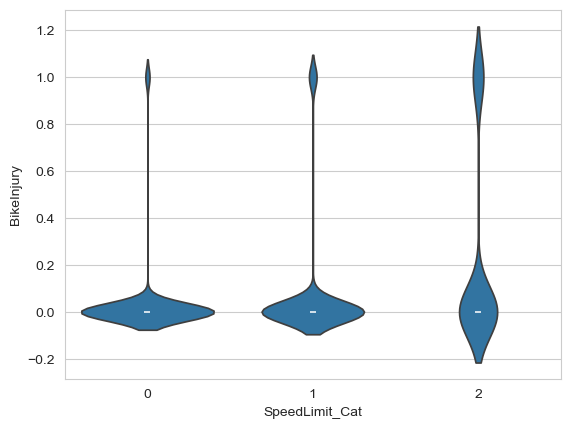

In [221]:
sns.violinplot(x='SpeedLimit_Cat',y='BikeInjury',data=Bike_train)

In [222]:
# This huge data imbalance is a problem for our model. In opposite sense to what we saw before, but still quite problematic.

In [223]:
# Fit logistic regression with no penalty to the training data
log_reg_none = LogisticRegression(random_state=614,penalty=None)
log_reg_none.fit(Bike_train[['SpeedLimit_Cat']],Bike_train['BikeInjury'])


LogisticRegression(penalty=None, random_state=614)

In [224]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Evaluate the model on the validation set
print('Validation Accuracy:', accuracy_score(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))
print('Validation Recall:', recall_score(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))
print('Validation Precision:', precision_score(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))
print('Validation Confusion Matrix:\n', confusion_matrix(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))

Validation Accuracy: 0.9245283018867925
Validation Recall: 0.0
Validation Precision: 0.0
Validation Confusion Matrix:
 [[1617    0]
 [ 132    0]]


c:\Users\ayman\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [225]:
# Fit logistic regression with default ridge penalty to the training data
log_reg_none = LogisticRegression(random_state=614)
log_reg_none.fit(Bike_train[['SpeedLimit_Cat']],Bike_train['BikeInjury'])

# Evaluate the model on the validation set
print('Validation Accuracy:', accuracy_score(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))
print('Validation Recall:', recall_score(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))
print('Validation Precision:', precision_score(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))
print('Validation Confusion Matrix:\n', confusion_matrix(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))

Validation Accuracy: 0.9245283018867925
Validation Recall: 0.0
Validation Precision: 0.0
Validation Confusion Matrix:
 [[1617    0]
 [ 132    0]]


c:\Users\ayman\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [226]:
# Due to the data imbalance, the majority class is being predicted all the time.

<Axes: xlabel='CrashHour', ylabel='BikeInjury'>

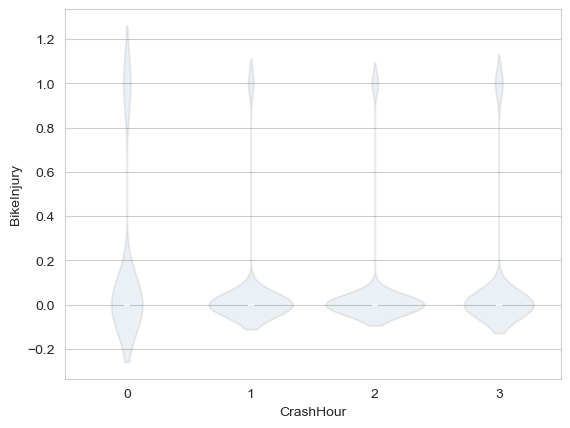

In [232]:
sns.violinplot(x='CrashHour',y='BikeInjury',data=Bike_train,alpha=0.1)

In [227]:
# Let's try using a different feature to see if we can get a better model.
# Combine hours into day parts
def day_part(hour):
    if hour < 6:
        return 0
    elif hour < 12:
        return 1
    elif hour < 18:
        return 2
    else:
        return 3
    
Bike_train['CrashHour'] = Bike_train['CrashHour'].apply(day_part)
Bike_val['CrashHour'] = Bike_val['CrashHour'].apply(day_part)

In [228]:
# Fit logistic regression with default ridge penalty to the training data
log_reg_none=LogisticRegression(penalty=None)
log_reg_none.fit(Bike_train[['CrashHour']],Bike_train['BikeInjury'])

# Evaluate the model on the validation set
print('Validation Accuracy:', accuracy_score(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[['CrashHour']])))
print('Validation Recall:', recall_score(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[['CrashHour']])))
print('Validation Precision:', precision_score(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[['CrashHour']])))
print('Validation Confusion Matrix:\n', confusion_matrix(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[['CrashHour']])))

Validation Accuracy: 0.9245283018867925
Validation Recall: 0.0
Validation Precision: 0.0
Validation Confusion Matrix:
 [[1617    0]
 [ 132    0]]


c:\Users\ayman\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Accuracy: 0.4368210405946255
Validation Recall: 0.4368210405946255
Validation Precision: 0.29653555897123646
Validation Confusion Matrix:
 [[  0   0  56   5]
 [  0   0 367  26]
 [  0   0 720  57]
 [  0   0 474  44]]


c:\Users\ayman\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ayman\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


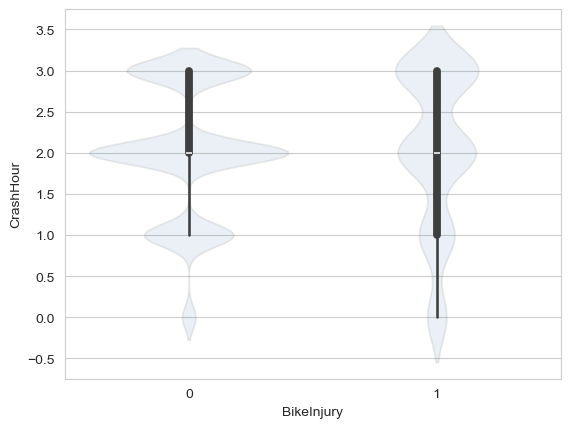

In [241]:
# What if we switched the x and y axes?

sns.violinplot(x='BikeInjury',y='CrashHour',data=Bike_train,alpha=0.1)

# Fit logistic regression with default ridge penalty to the training data
log_reg_none=LogisticRegression(penalty=None,multi_class='multinomial',solver='lbfgs')
log_reg_none.fit(Bike_train[['BikeInjury']],Bike_train['CrashHour'])

# Evaluate the model on the validation set
print('Validation Accuracy:', accuracy_score(Bike_val['CrashHour'],log_reg_none.predict(Bike_val[['BikeInjury']])))
print('Validation Recall:', recall_score(Bike_val['CrashHour'],log_reg_none.predict(Bike_val[['BikeInjury']]), average='micro'))
print('Validation Precision:', precision_score(Bike_val['CrashHour'],log_reg_none.predict(Bike_val[['BikeInjury']]),average='weighted'))
print('Validation Confusion Matrix:\n', confusion_matrix(Bike_val['CrashHour'],log_reg_none.predict(Bike_val[['BikeInjury']])))